In [58]:
import csv
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import matplotlib.patches as mpatches

In [2]:
Event = namedtuple('event', 'name disgusting disturbing chaos offensive positive')

In [3]:
events = []
with open('commercial_events.txt', 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=' ')
    line_count = 0
    for row in csv_reader:
        event = Event(' '.join(row[:-5]), *row[-5:])
        events.append(event)
events = np.array(events)

In [5]:
data = np.array([np.array(e[1:]) for e in events])
n_samples, n_features = data.shape
# n_digits = len(np.unique(digits.target))

In [6]:
estimator=KMeans(init='k-means++', n_clusters=3, n_init=10)

In [7]:
estimator.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
pca = PCA(n_components=n_features).fit(data)

In [60]:
plt.cm.jet([0.25,0.75]) 

array([[ 0.        ,  0.50392157,  1.        ,  1.        ],
       [ 1.        ,  0.58169935,  0.        ,  1.        ]])

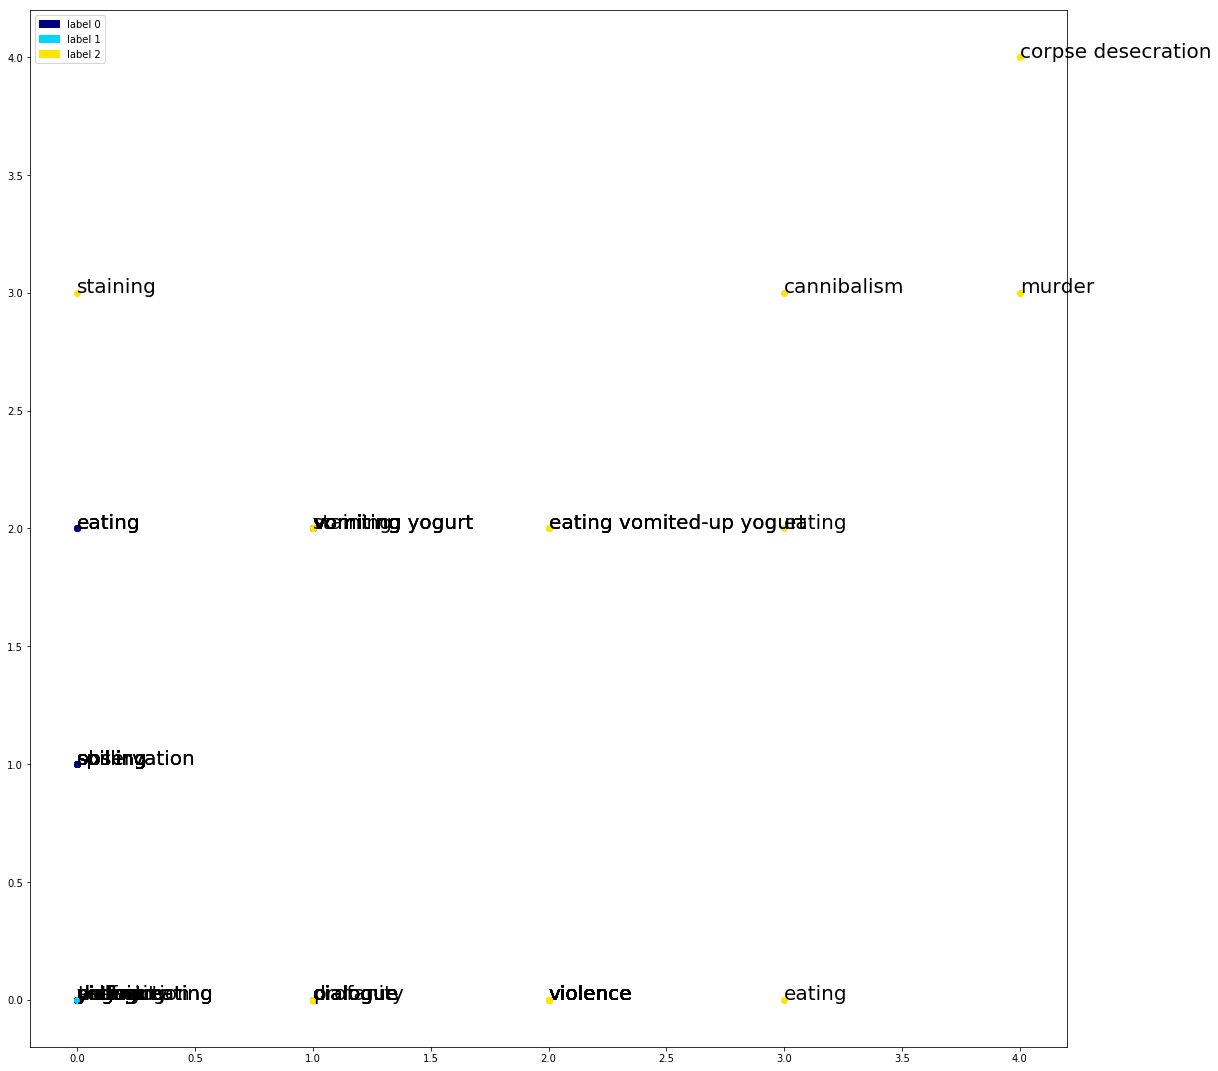

-> label 0
dialogue
vomiting
dialogue
spilling
dialogue
vomiting
dialogue
spilling
dialogue
dialogue
vomiting
collision
observation
dialogue
dialogue
dialogue
eating
dialogue
dialogue
vomiting
dialogue
spilling
spilling
spilling
dialogue
eating
yogurt eating
vomiting
dialogue
spilling
dialogue
vomiting
dialogue
dialogue
dialogue
spilling
eating
yogurt eating
spilling
dialogue
dialogue
dialogue
eating
yogurt eating
vomiting
spilling
spilling
dialogue
vomiting
spilling
dialogue
dialogue
dialogue
dialogue
dialogue
dialogue
dialogue
dialogue
dialogue
dialogue
dialogue
dialogue
spilling
spilling
spilling
spilling
spilling
destruction
vomiting
collision
spilling
spilling
dialogue
dialogue
vomiting
observation
spilling
spilling
spilling
dialogue
spilling
spilling
dialogue
vomiting
dialogue
spilling
spilling
throwing



-> label 1
profanity
profanity



-> label 2
staining
dialogue
vomiting yogurt
eating vomited-up yogurt
eating vomit
eating vomited-up yogurt
vomiting yogurt
dialogue
violence


In [71]:
n_clusters=3

# reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(data)
fig = plt.figure(figsize=(18, 18))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xlim=(-1, 5)
ylim=(-1, 5)

patches = []
colors = plt.cm.jet([float(i)/n_clusters for i in range(n_clusters)]) 

for label, color in zip(set(kmeans.labels_), colors):
    
    labeled_events = events[kmeans.labels_ == label]
    x = [float(e[1]) for e in labeled_events]
    y = [float(e[2]) for e in labeled_events]
    
    ax.plot(x, y, 'o', color=color)
    patches.append(mpatches.Patch(label='label {}'.format(label), color=color))
    
    for e, xx, yy in zip(labeled_events, x, y):
        if xx > xlim[0] and xx < xlim[1] and yy > ylim[0] and yy < ylim[1]:
            ax.text(xx, yy, e[0], fontsize=20)
    
    
plt.legend(handles=patches)

plt.show()
            

ax.set_xlim(-1, 6)
ax.set_ylim(-1, 5)
plt.show(fig)

for label in set(kmeans.labels_):
    print('-> label {}'.format(label))
    for e in events[kmeans.labels_ == label]:
        print(e[0])
    print('\n\n')

0
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
['0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '1' '1'
 '0' '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '0' '0' '0' '1' '1' '0' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '0'
 '0' '1' '1' '0' '0' '1' '1' '1' '1' '0' '1' '1' '0' '0' '1' '1' '0']
[['dialogue' '0' '0' '0' '0' '0']
 ['dialogue' '0' '0' '0' '0' '0']
 ['spilling' '0' '1' '1' '0' '0']
 ['dialogue' '0' '0' '0' '0' '0']
 ['dialogue' '0' '0' '0' '0' '0']
 ['spilling' '0' '1' '1' '0' '0']
 ['dialogue' '0' '0' '0' '0' '0']
 ['collision' '0' '0' '1' '0' '0']
 ['observation' '0' '1' '1' '0' '0']
 ['dialogue' '0' '0' '0' '0' '0']
 ['dialogue' '0' '0' '0' '0' '0']
 ['eating' '0' '0' '0' '0' '0']
 ['dialogu

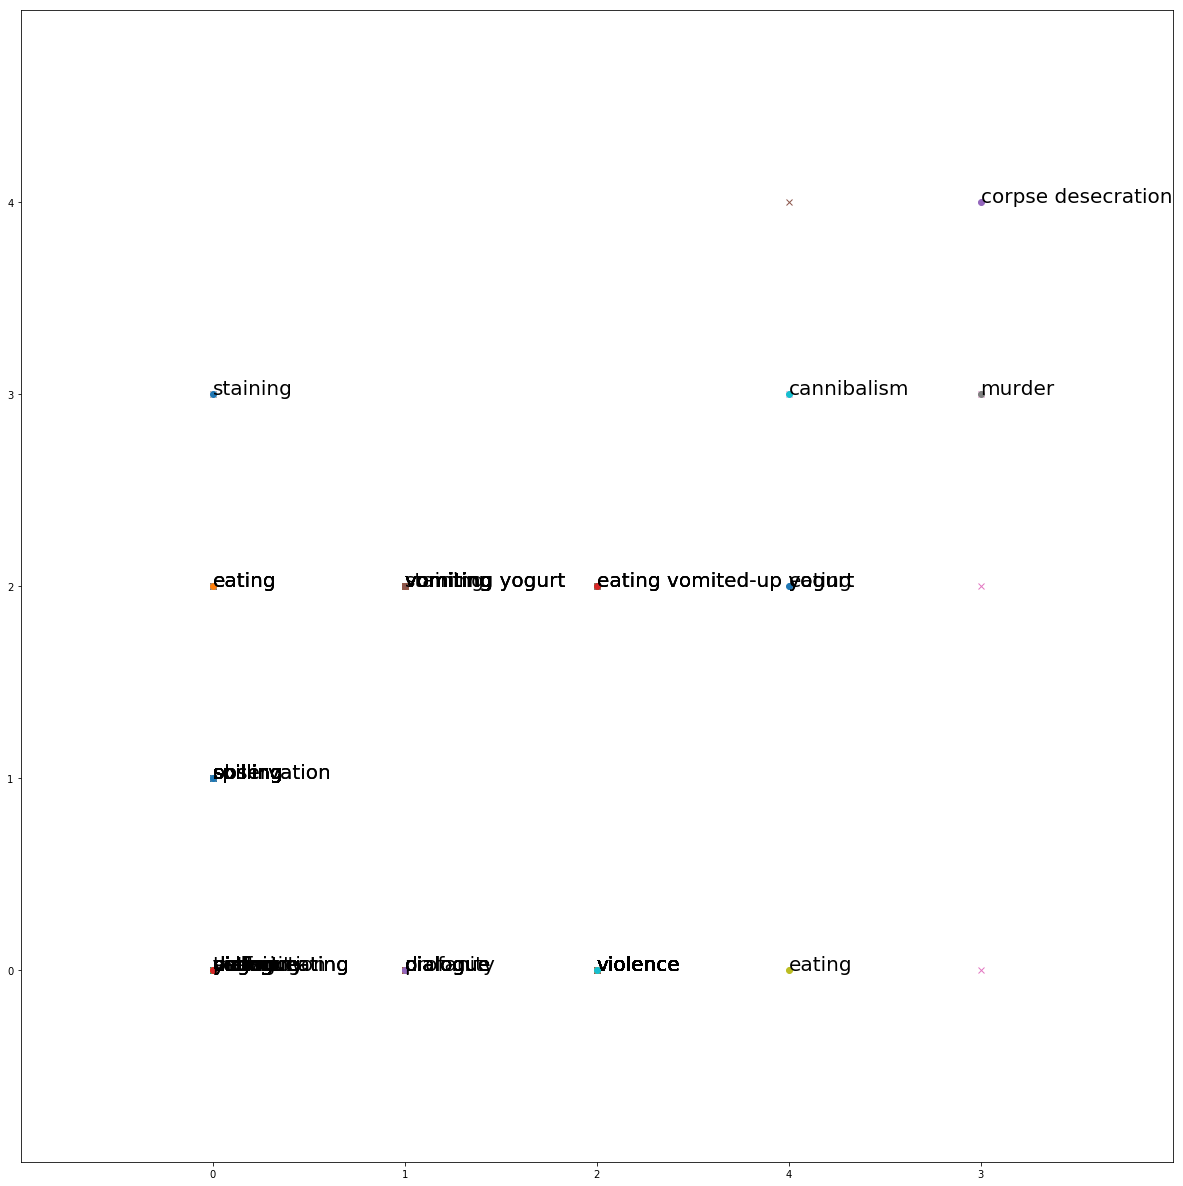

In [48]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(20,20))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# ax.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

xlim=(-1, 5)
ylim=(-1, 5)

for label in set(kmeans.labels_):
    subdat = data[kmeans.labels_ == label]
    sube = events[kmeans.labels_ == label]
    
    ax.plot(subdat[:, 0], subdat[:, 1], 'x')
    print(label)
    print(subdat[:, 0])
    print(subdat[:, 1])
    print(sube)
    for e in sube:
        x = float(e[1])
        y = float(e[2])
        if x > xlim[0] and x<xlim[1] and y>ylim[0] and y<ylim[1]:
            ax.plot([x], [y], 'o')
            ax.text(x, y, e[0], fontsize=20)
    
centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
# plt.xticks(())
# plt.yticks(())
plt.show(fig)